In [1]:
from bs4 import BeautifulSoup
import requests
res=requests.get('https://www.imdb.com/title/tt0944947/reviews?ref_=tt_ql_3')
bs=BeautifulSoup(res.content,'html.parser')
#print(bs)
all_reviews = bs.find_all('div',{'class':'text show-more__control'})

    

  

In [2]:
reviews = []
print(all_reviews)
for text in all_reviews:
    reviews.append(text.get_text())

    

[<div class="text show-more__control">It was a master piece. It was written to the perfection. It was mesmerizing. It was gripping. It was so shocking that if someone is binge watching this show he/she will need a time-off in between to get their head around things and accept some messed up, yet mind blowing development.<br/><br/>But yet, I cant hate it enough after final season. Its like you came to know that you were in love with the wrong one all along. It was like looking at a completely different person. It was like seeing your own dreams and expectations get destroyed. It was not a let down, it was a BETRAYAL!</div>, <div class="text show-more__control">Let's say you're reading these reviews and haven't watched GoT yet, but now that it's finished are considering the marathon. What's the consensus? In this case, the consensus is accurate, and that is:<br/><br/>Seasons 1-6: outstanding. Deep world-building, intelligent dialogue, epic set-pieces worthy of Hollywood, expert acting, d

In [3]:
reviews[1]

"Let's say you're reading these reviews and haven't watched GoT yet, but now that it's finished are considering the marathon. What's the consensus? In this case, the consensus is accurate, and that is:Seasons 1-6: outstanding. Deep world-building, intelligent dialogue, epic set-pieces worthy of Hollywood, expert acting, detailed plotting, genuine surprises, great soundtrack used sparingly. GoT is worth watching for these seasons, definitely.Season 7: you suddenly notice the writing and plotting has taken a sharp dive downwards in quality. There are inexplicable ideas, inconsistent characterisation and soap-opera dramas. But at least the entertainment value is still very high, so it gets a pass.Season 8: this drop chasms down to depths you didn't think possible. The writing has got so amateurish that the still-fantastic production values are no longer enough to save it. If you ever enjoyed Lost but were amazed at how bad the final season was, you're in familiar territory here.The bigges

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\M433IA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:

sia = SIA()
results = []
for line in reviews:
    pol_score = sia.polarity_scores(line)
    pol_score['review'] = line
    results.append(pol_score)

print(results[:3])


[{'neg': 0.13, 'neu': 0.684, 'pos': 0.186, 'compound': 0.7404, 'review': 'It was a master piece. It was written to the perfection. It was mesmerizing. It was gripping. It was so shocking that if someone is binge watching this show he/she will need a time-off in between to get their head around things and accept some messed up, yet mind blowing development.But yet, I cant hate it enough after final season. Its like you came to know that you were in love with the wrong one all along. It was like looking at a completely different person. It was like seeing your own dreams and expectations get destroyed. It was not a let down, it was a BETRAYAL!'}, {'neg': 0.122, 'neu': 0.667, 'pos': 0.211, 'compound': 0.9862, 'review': "Let's say you're reading these reviews and haven't watched GoT yet, but now that it's finished are considering the marathon. What's the consensus? In this case, the consensus is accurate, and that is:Seasons 1-6: outstanding. Deep world-building, intelligent dialogue, epic

In [6]:
import pandas as pd
df = pd.DataFrame.from_records(results)
df.head()


,neg,neu,pos,compound,review
0,0.130,0.684,0.186,0.7404,It was a master piece. It was written to the p...
1,0.122,0.667,0.211,0.9862,Let's say you're reading these reviews and hav...
2,0.093,0.805,0.103,0.4129,Till season 7 very likely the best TV show eve...
3,0.047,0.828,0.126,0.9405,So imagine you go into an ice cream shop and y...
4,0.139,0.747,0.113,-0.8489,I'm feeling so heartbroken to see everyone cri...


In [7]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1


In [8]:
df[df['label']==-1]

,neg,neu,pos,compound,review,label
4,0.139,0.747,0.113,-0.8489,I'm feeling so heartbroken to see everyone cri...,-1
5,0.243,0.645,0.112,-0.6187,Started off as the greatest series of all time...,-1
7,0.152,0.749,0.099,-0.9872,I would give this an easy 10/10.. if season 8 ...,-1
8,0.216,0.650,0.134,-0.9218,"For a series with such a complexity, many-laye...",-1
10,0.110,0.802,0.088,-0.8985,The first 5 Seasons of Game Of Thrones are exc...,-1


In [9]:
df[df['label']==1]

,neg,neu,pos,compound,review,label
0,0.130,0.684,0.186,0.7404,It was a master piece. It was written to the p...,1
1,0.122,0.667,0.211,0.9862,Let's say you're reading these reviews and hav...,1
2,0.093,0.805,0.103,0.4129,Till season 7 very likely the best TV show eve...,1
3,0.047,0.828,0.126,0.9405,So imagine you go into an ice cream shop and y...,1
9,0.078,0.720,0.202,0.6815,This is the first series i would recommend to ...,1
11,0.107,0.726,0.167,0.7579,"As GoT started, the first four seasons were in...",1
12,0.062,0.795,0.143,0.9627,The ending of this series is a disservice to t...,1
13,0.081,0.759,0.160,0.8209,GOT is an amazing show! But..... the last seas...,1
14,0.107,0.745,0.147,0.3848,At first I did not want to watch the series.\n...,1
15,0.126,0.524,0.351,0.6476,A series like never seen before which rocked l...,1


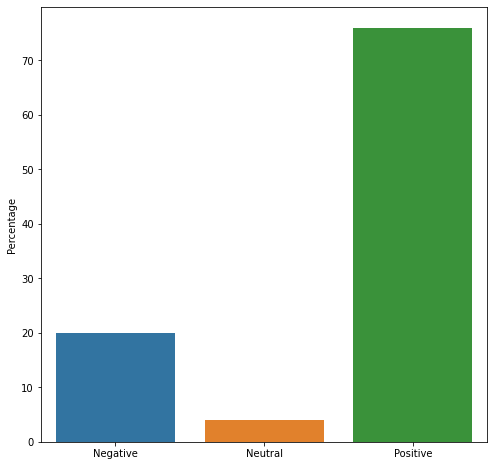

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [11]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
nlp = spacy.load('en_core_web_md')



In [12]:
def process_text(reviews):
    tokens = []
    i = 0
    for line in reviews:
        toks = nlp(line)
        toks.user_data["title"] = "Sentence no.: "+str(i)
        displacy.render(toks, style="ent")
        lemmas = [token.lemma_ for token in toks] #remove digits and special characters
        stopwords = spacy.lang.en.stop_words.STOP_WORDS
        a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords] #remove stopwords
        # Print string after text cleaning
        tokens.append(' '.join(a_lemmas)) 
        i = i+1
    return tokens

In [13]:
pos_lines = list(df[df.label == 1].review)

pos_tokens = process_text(pos_lines)

#pos_freq = nltk.FreqDist(pos_tokens)

#pos_freq.most_common(20)

C:\Users\M433IA\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [14]:
print("After stopword removal:\n",pos_tokens[0])

After stopword removal:
 master piece write perfection mesmerizing grip shocking binge watch need time head thing accept mess mind blow development hate final season like come know love wrong like look completely different person like dream expectation destroy let betrayal
